# Центральная предельная теорема своими руками
## Экспоненциальное распределение

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Часть 1: построение гистограмы и теоретической плотности распределения

Экспоненциальное (или показательное) распределение — абсолютно непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события. 
Случайная величина $X$ имеет экспоненциальное распределение с параметром $\lambda > 0 $, если её плотность вероятности имеет вид:

$$
f_X(x) = \begin{cases}
\lambda \,e^{-\lambda x} ,& x \ge 0, \\
0 ,& x < 0.
\end{cases} $$

Интегрируя плотность, получаем функция распределения:

$$
F_X(x) = \left\{\begin{matrix}
1-e^{-\lambda x}&,\; x \ge 0, \\
0 ,& x < 0.
\end{matrix}\right.$$


Несложным интегрированием находим, что математическое ожидание определяется как: 

$$\mu = \frac{1}{\lambda},$$
а дисперсия равна:
$$\sigma = \frac{1}{\lambda^2}.$$

In [5]:
# зададим экспоненциально распределенную случайную величину
expon = sts.expon()

В функции ```expon``` параметр ```loc```, задающий $\mu$, по-умолчанию равен 1, следовательно ```scale```, среднеквадратичное отклонение $\sigma$, также равно 1.

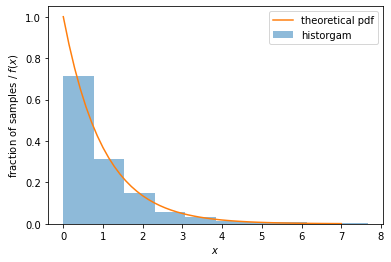

In [6]:
# сгенерируем из выборку объёма 1000
sample = expon.rvs(size=1000)
# строим гистограму по сгенерированной выборке: сделаем её несколько прозрачной во имя красоты визуализации
plt.hist(sample, label='historgam', density=True, histtype='stepfilled', alpha=0.5)

# строим теоретическую плотность экспоненциального распределения
x = np.linspace(0, 7)
pdf = expon.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1)

# именуем оси и указываем, что нужна легенда: 
plt.ylabel('fraction of samples / $f(x)$')
plt.xlabel('$x$')
plt.legend()

# отображаем график
plt.show()

## Часть 2: оценка распределения выборочного среднего

Мы помним, что для выбранного экспоненциального распределения
$$\mu = \frac{1}{\lambda} = \lambda^{-1},$$
$$\sigma = \frac{2}{\lambda^2} = \lambda^{-2}.$$

Следовательно значения параметров нормального распределеная, которым, согласно центральной предельной теореме, приближается распределение выборочных средних можно рассчитать как: 

$$\mu = \lambda^{-1},$$
$$\sigma = \frac{\lambda^{-2}}{n},$$

где $n$ — объем выборки.

### Случай 1: пусть $n = 5$

In [7]:
# вычислим параметры нормальных распределений, аппроксимирующих выборочные средние при заданном n
lambd = 1 
n = 5
mu = lambd**(-1)
sigma_sqr = lambd**(-2) / n 
sigma = sigma_sqr**(1/2) # помним, что при генерации нормального распределения нужна величина среднеквадратичного отклонения

# зададим нормально распределенную случайную величину, соответствующую рассчитанным параметра
norm_rv = sts.norm(loc=mu, scale=sigma)

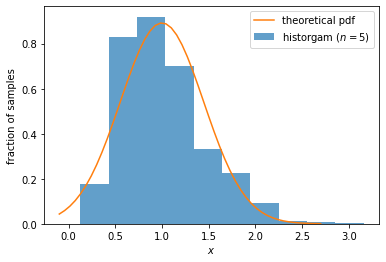

In [8]:
# подготовим список, куда будем сохранять выборочные средние по каждой из сгенерированных выборок
sample_5 = []
for i in range(1000): # повторяем 1000 раз
    sample_5.append(expon.rvs(size=5).mean()) # генерируем выборку размером 5, добавляем в список её выборочное среднее

# строим гистограму распределения выборочных средних: сделаем её несколько прозрачной во имя красоты визуализации
plt.hist(sample_5, label='historgam ($n = 5$)', density=True, histtype='stepfilled', alpha=0.7)

# строим теоретическую плотность нормального распределения, которое должно аппроксимировать распределение выборочных средних
x = np.linspace(-0.1, 2.7)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1)

# именуем оси и указываем, что нужна легенда: 
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

# отображаем график
plt.show()

### Случай 2: пусть $n = 50$

In [9]:
# вычислим параметры нормальных распределений, аппроксимирующих выборочные средние при заданном n
lambd = 1 
n = 50
mu = lambd**(-1)
sigma_sqr = lambd**(-2) / n 
sigma = sigma_sqr**(1/2) # помним, что при генерации нормального распределения нужна величина среднеквадратичного отклонения

# зададим нормально распределенную случайную величину, соответствующую рассчитанным параметра
norm_rv = sts.norm(loc=mu, scale=sigma)

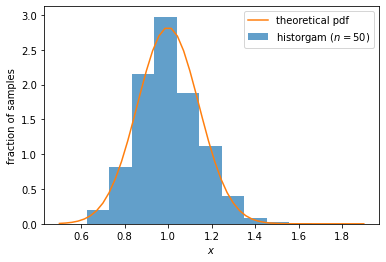

In [10]:
# подготовим список, куда будем сохранять выборочные средние по каждой из сгенерированных выборок
sample_5 = []
for i in range(1000): # повторяем 1000 раз
    sample_5.append(expon.rvs(size=50).mean()) # генерируем выборку размером 50, добавляем в список её выборочное среднее

# строим гистограму распределения выборочных средних: сделаем её несколько прозрачной во имя красоты визуализации
plt.hist(sample_5, label='historgam ($n = 50$)', density=True, histtype='stepfilled', alpha=0.7)

# строим теоретическую плотность нормального распределения, которое должно аппроксимировать распределение выборочных средних
x = np.linspace(0.5,1.9)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1)

# именуем оси и указываем, что нужна легенда: 
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

# отображаем график
plt.show()

### Случай 3: пусть $n = 500$

In [11]:
# вычислим параметры нормальных распределений, аппроксимирующих выборочные средние при заданном n
lambd = 1 
n = 500
mu = lambd**(-1)
sigma_sqr = lambd**(-2) / n 
sigma = sigma_sqr**(1/2) # помним, что при генерации нормального распределения нужна величина среднеквадратичного отклонения

# зададим нормально распределенную случайную величину, соответствующую рассчитанным параметра
norm_rv = sts.norm(loc=mu, scale=sigma)

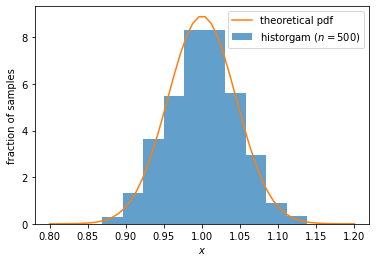

In [12]:
# подготовим список, куда будем сохранять выборочные средние по каждой из сгенерированных выборок
sample_5 = []
for i in range(1000): # повторяем 1000 раз
    sample_5.append(expon.rvs(size=500).mean()) # генерируем выборку размером 500, добавляем в список её выборочное среднее

# строим гистограму распределения выборочных средних: сделаем её несколько прозрачной во имя красоты визуализации
plt.hist(sample_5, label='historgam ($n = 500$)', density=True, histtype='stepfilled', alpha=0.7)

# строим теоретическую плотность нормального распределения, которое должно аппроксимировать распределение выборочных средних
x = np.linspace(0.8,1.2)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1)

# именуем оси и указываем, что нужна легенда: 
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

# отображаем график
plt.show()

## Выводы

Данное задание наглядно продемонстировало действие центральное предельной теоремы (ЦПТ). 
Изначально было выбрано скошенное распределение, поэтому использование выборочных средних по выборкам объема 5 не лучшим образом приближалось нормальным распределением с расчетными параметрами (см. рисунок в разделе случай 1). Использование в качестве объема выборки значения 50 приводит к тому, что скошенность начинает невелировать и полученная гистограмма <<лучше>> вписывается в <<шляпу>> плотности нормально распределения, однако при внимательном рассмотрении столбцов гистограмы всё же видна скошенность влево (см. рисунок в разделе случай 2). В случае $n = 500$ распределение выборочных средних сгенерированных выборок уже <<хорошо>> аппроксимируется нормальным распределеним с расчетными теоретическими параметрами.

## Распределение Парето. 

In [13]:
from scipy.stats import pareto, norm

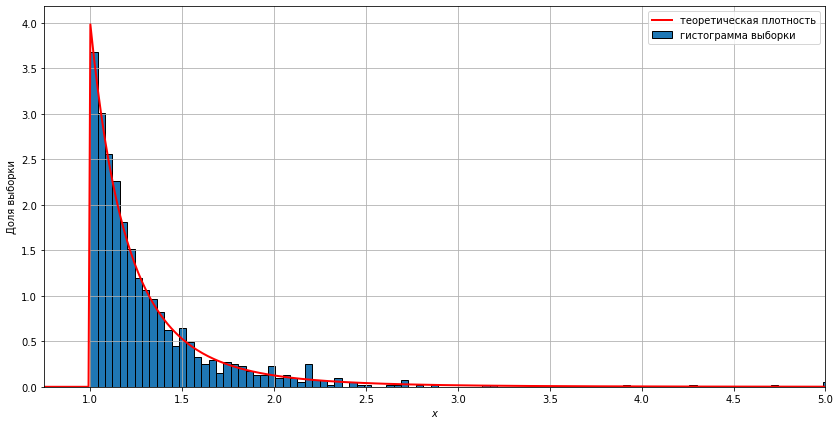

In [14]:
# Сгенерируем выборку объема 1000 из распределения Парето
b = 4
n = 1000
pareto_rv = pareto(b)
sample = pareto_rv.rvs(n)

# Построим гистограмму и теоретическую плотность распределения
plt.figure(figsize=(14, 7))
plt.hist(sample, density=True, edgecolor='black', bins=100, label='гистограмма выборки')
plt.ylabel('Доля выборки')
plt.xlabel('$x$')
plt.grid()

x = np.linspace(0, 10, 1000)
pdf = pareto_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1, color='red', linewidth=2)
plt.xlim((0.75, 5))
plt.legend()

### Для разных значений $n$ сгенерируем 1000 выборок объема n, построим гистограммы выборочных средних и наложим соответствующую теоретическую плотность нормального распределения. 

В соответствии с ЦПТ: $$\overline{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$$

$$ \mu = \frac{b}{b-1} = 1.5 $$
$$ \sigma = \frac{1}{b-1}\sqrt{\frac{b}{b-2}} = \frac{\sqrt{3}}{2} $$

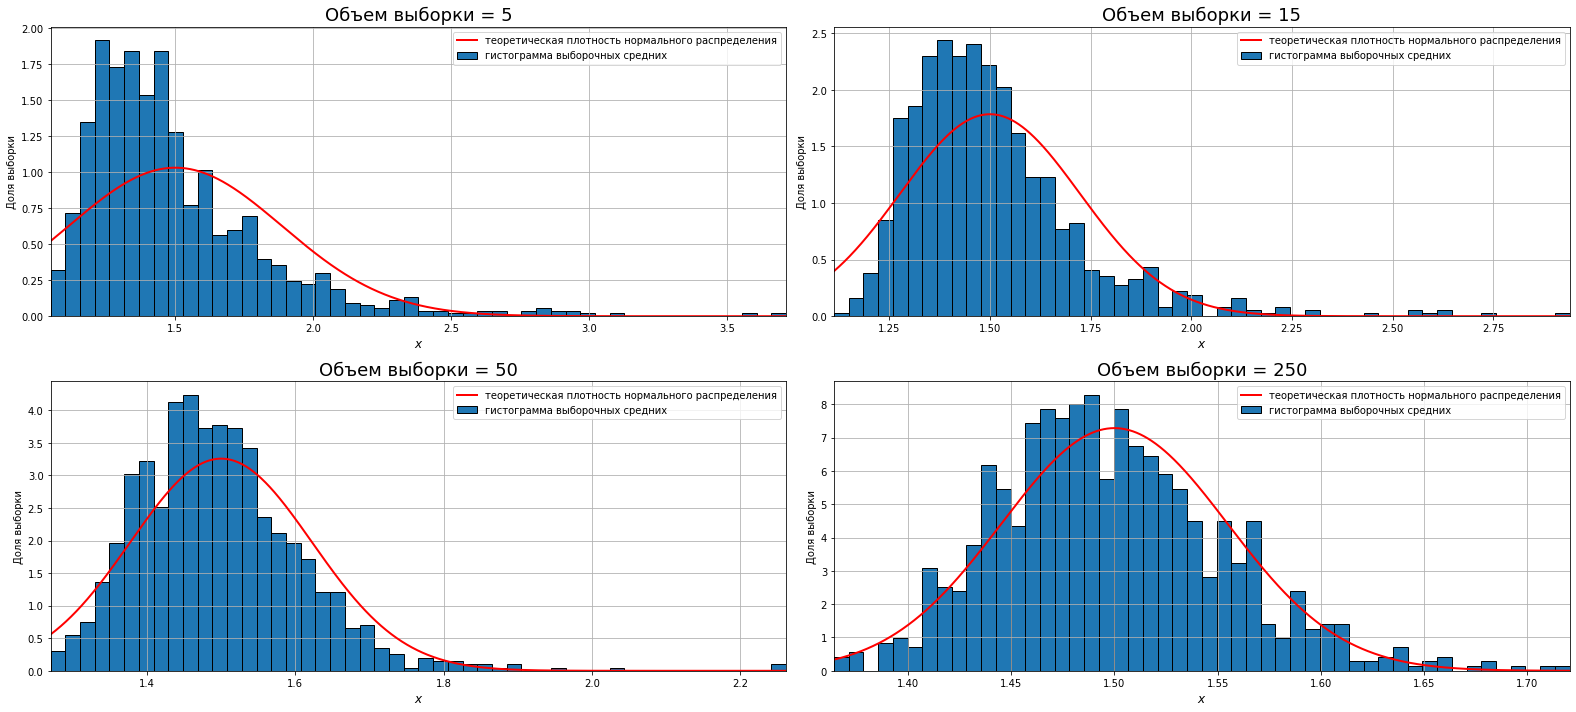

In [16]:
b = 3
mu, var = (float(item) for item in pareto.stats(b))
pareto_rv = pareto(b)
count = 1000
plt_idx = 0
n_list = [5, 15, 50, 250]
fig, axes = plt.subplots(2, 2, figsize=(22, 10))
axes = axes.flatten()

for n in n_list:
    sample_means = []
    for _ in range(count):
        sample = pareto_rv.rvs(n)
        sample_means.append(sample.mean())
    
    x_left, x_right = min(sample_means), max(sample_means)
    x = np.linspace(x_left, x_right, 1000)
    
    # Сгенерируем нормальное распределение с соотв. средним и отклонением
    norm_rv = norm(mu, (var / n) ** 0.5)
    pdf = norm_rv.pdf(x)

    axes[plt_idx].hist(
        sample_means,
        density=True,
        edgecolor='black',
        bins=50,
        label=f'гистограмма выборочных средних'
    )
    axes[plt_idx].plot(
        x,
        pdf,
        label='теоретическая плотность нормального распределения',
        alpha=1,
        color='red',
        linewidth=2
    )
    
    axes[plt_idx].set_ylabel('Доля выборки')
    axes[plt_idx].set_xlabel('$x$', fontsize=12)
    axes[plt_idx].legend()
    axes[plt_idx].set_xlim((x_left, x_right))
    axes[plt_idx].set_title(f'Объем выборки = {n}', fontsize=18)
    axes[plt_idx].grid()
    
    plt_idx += 1

fig.tight_layout()

Выводы: по графика видно, что с ростом  𝑛  плотность нормального распределения все лучше и лучше аппроксимирует гистограмму выборочнх средних. В связи с тем, что исходное распределение абсолютно отлично от нормального, то для достижения желаемого эффекта, нужно брать довольно большие  𝑛